1. Data Preparation:
- Download and explore the Global Superstore Orders dataset.
- Perform basic data cleaning and preprocessing.

2. Data Visualization with Plotly:
- Create an interactive line chart to show sales trends over the years.
- Build an interactive map to visualize sales distribution by country.

3. Data Visualization with Plotnine:
- Use Plotnine to generate a bar chart showing top 10 products by sales.
- Create a scatter plot to analyze the relationship between profit and discount.

4. Comparative Analysis:
- Compare the insights gained from Plotly and Plotnine visualizations.
- Document your observations about the ease of use and effectiveness of both tools.

5. Code and Insights:
- Write clear, well-documented Python code.
- Include your analysis and insights as comments or markdown cells in your Jupyter notebook.

In [2]:
import pandas as pd

df = pd.read_excel('US_store_data.xlsm')

In [3]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [9]:
df['Order Date'].dt.year.unique()

array([2016, 2015, 2014, 2017])

In [10]:
import plotly.express as px

In [11]:
df['Year'] = df['Order Date'].dt.year
total_sales = df.groupby('Year')['Sales'].sum().reset_index()
total_sales

,Year,Sales
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


In [12]:
fig = px.scatter(total_sales,x='Year',y='Sales', title = 'Sales by year')
fig.show()

In [13]:
px.bar(total_sales,x='Year',y='Sales', title = 'Sales by year',color='Sales')


In [14]:
fig = px.line(total_sales, x='Year', y='Sales', title='Sales Trends Over the Years')
fig.update_layout(xaxis_title='Year', yaxis_title='Total Sales')
fig.show()

In [15]:
sales_by_country = df.groupby('Country')['Sales'].sum().reset_index()

fig = px.choropleth(sales_by_country, locations='Country', locationmode='country names', color='Sales',
                    hover_name='Country', color_continuous_scale='Viridis',
                    title='Sales Distribution by Country')
fig.show()

In [34]:
from plotnine import *
import matplotlib.pyplot as plt
sales_by_product = df.groupby('Product Name')['Sales'].sum().reset_index()

top_10_products = sales_by_product.nlargest(10, 'Sales')
top_10_products 


,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
786,HON 5400 Series Task Chairs for Big and Tall,21870.576
686,GBC DocuBind TL300 Electric Binding System,19823.479
688,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
805,Hewlett Packard LaserJet 3310 Copier,18839.686
787,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
683,GBC DocuBind P400 Electric Binding System,17965.068
813,High Speed Automatic Electric Letter Opener,17030.312


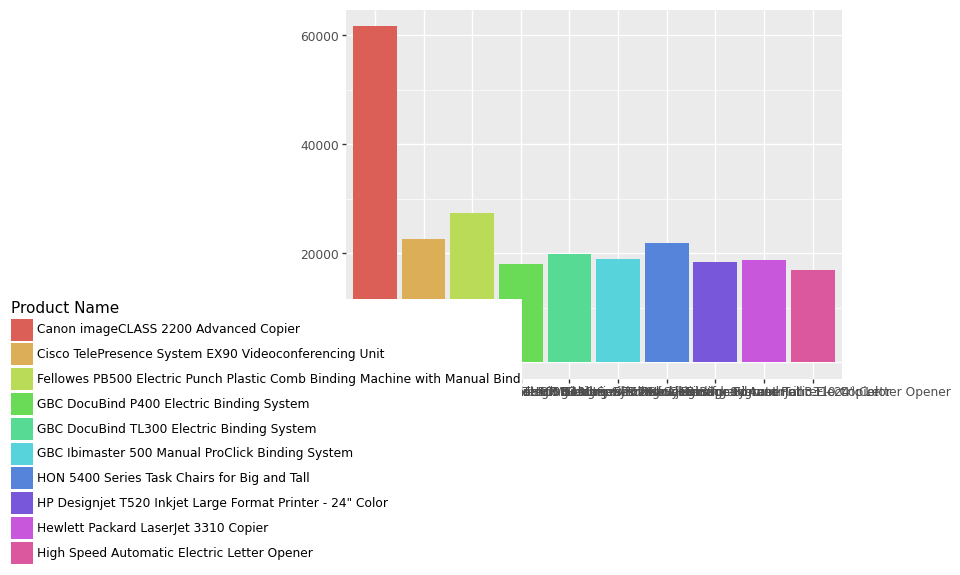

In [43]:
bar_chart = (
    ggplot(top_10_products)
    + aes(x='Product Name', y='Sales', fill='Product Name')
    + geom_bar(stat='identity')
)

bar_chart.draw()

In [46]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015


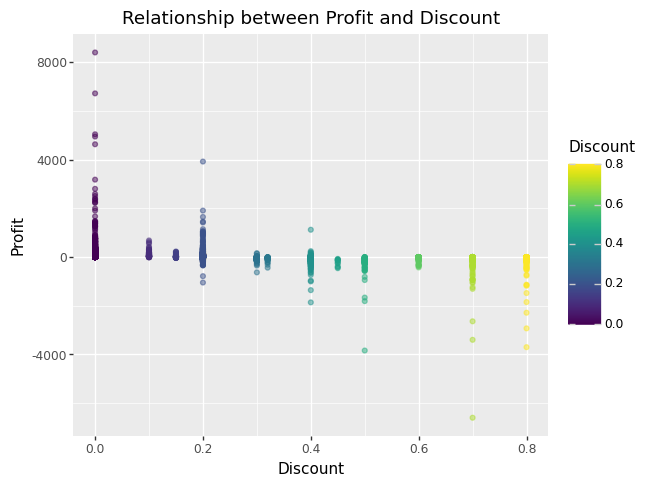

In [58]:
scatter_plot = (
    ggplot(df)+
    aes(x='Discount', y='Profit',color='Discount') +
    geom_point(alpha=0.5) +
    labs(title='Relationship between Profit and Discount', x='Discount', y='Profit')
)

scatter_plot.draw()

Comparative Analysis:
- Compare the insights gained from Plotly and Plotnine visualizations.
- Document your observations about the ease of use and effectiveness of both tools.


Plotly is great for interactive visualizations with an easy-to-use interface and features like zooming and hovering. It's ideal for exploring complex datasets and sharing insights.

Plotnine, based on ggplot2, offers flexibility and customization for static, publication-quality visualizations. While its syntax may be less intuitive, it provides precise control over plot aesthetics.

In summary, Plotly is best for interactive exploration, while Plotnine is suited for creating static, detailed plots for reports or publications. Choose based on your specific needs and audience preferences.